In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
from spellchecker import SpellChecker
spell = SpellChecker()


In [37]:
# Cargar los conjuntos de datos etiquetado y no etiquetado
train_data = pd.read_csv('train_analysis.csv') #pd.read_csv('train.csv')
test_data = pd.read_csv('test_nolabel_analysis.csv') #pd.read_csv('test_nolabel.csv')
train_data[:5]

,label,text,id,clean_text,corrections,url,hashtag,emojis,negative_words
0,0,"Hi Roy hope you are ok, Trans people are not g...",95e98db99c2,hi boy hope of Trans people gay thing s ram th...,4,0,0,0,0
1,0,But fuckin' hell what even is biology,a87b8708e63,fucking hell biology,1,0,0,0,3
2,0,Whose the nice looking clergyman?,5b3cb03803f,nice look clergyman,0,0,0,0,0
3,1,"AIDS ARE IN YOUR WAY, SIN HAS CONSEQUENCES AND...",5b0bad2347e,AIDS way SIN consequences bad,0,0,0,0,0
4,0,to learn,332048bd188,learn,0,0,0,0,0


In [21]:
# Función para extraer URLs
def extract_urls(text):
    urls = re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)
    return len(urls) 

# Función para extraer hashtags
def extract_hashtags(text):
    hashtags = re.findall(r'#\w+', text)
    return len(hashtags) 

# Función para ver si hay emojis en el texto
def count_emojis(text):
    emojis = [c for c in text if emoji.is_emoji(c)]
    return len(emojis)
    
# Lista de palabras consideradas como insultos, negativas u ofensivas en inglés
negative_words = ['idiot', 'stupid', 'moron', 'fool', 'asshole', 'dumb', 'loser', 'jerk', 'bitch', 'bastard', 
                'fuck', 'shit', 'cock', 'cunt', 'pussy', 'dick', 'twat', 'wanker', 'prick', 'slut', 
                'whore', 'motherfucker', 'ass', 'bitchy', 'bitching', 'bollocks', 'bugger', 'crap', 
                'dammit', 'damn', 'darn', 'fanny', 'flipping', 'friggin', 'godammit', 'goddamn', 'hell', 
                'holy shit', 'jackass', 'piss', 'screw', 'screw you', 'screwed', 'screwing', 'sucks', 
                'wank', 'wanking', 'wtf', 'arse', 'bloody', 'cocky', 'douchebag', 'freaking', 'hell', 
                'jesus', 'jesus christ', 'oh my god', 'omg', 'shithead', 'son of a bitch', 'wth',

    "abuse", "accident", "addiction", "aggression", "agony", "alarm", "alienation", "anger", "anguish", "annoyance",
    "anxiety", "apathy", "argument", "assault", "attack", "awkward", "bad", "betrayal", "bitter", "bleak",
    "bloodshed", "boring", "bother", "brutality", "bullying", "burden", "catastrophe", "chaos", "cheat", "collapse",
    "conflict", "confusion", "contagion", "corruption", "crazy", "crime", "criticism", "cruel", "crying", "damage",
    "danger", "dark", "deadly", "death", "debt", "deceive", "defeat", "deficiency", "depression", "despair", "destroy",
    "detest", "devastate", "die", "difficult", "disagree", "disappointment", "disaster", "discomfort", "discrimination",
    "disgust", "dishonest", "dismay", "disorder", "dispute", "dissatisfaction", "distort", "distress", "distrust",
    "domination", "doom", "dread", "dull", "embarrass", "enemy", "enrage", "enstrangement", "evil", "exhaust",
    "failure", "fake", "fear", "fight", "foolish", "forbid", "frustrate", "fury", "gloomy", "grave", "grief",
    "grisly", "gross", "guilt", "harm", "hate", "hazard", "hell", "hideous", "hopeless", "horrible", "hostility",
    "hurt", "hysteria", "ignorance", "ill", "illness", "impatient", "imperfect", "impossible", "inadequate", "incite",
    "incompetent", "inconvenience", "incurable", "indecisive", "inferior", "inflict", "injure", "injustice", "insane",
    "insensitive", "insult", "intolerant", "irrational", "irritate", "jealousy", "jinx", "kill", "lament", "lethal",
    "lie", "loneliness", "loss", "mad", "malicious", "misbehavior", "miserable", "misery", "misfortune", "mistake",
    "mortify", "murder", "nasty", "negative", "nightmare", "noisy", "obnoxious", "offend", "oppression", "outrage",
    "pain", "panic", "paranoia", "peril", "perplex", "pest", "pessimistic", "petty", "phobia", "plague", "poison",
    "poor", "pressure", "problem", "profane", "prohibit", "punish", "quarrel", "rage", "rant", "rape", "rebel",
    "regret", "reject", "repel", "repress", "revenge", "ridicule", "rude", "ruin", "sad", "scare", "scream",
    "selfish", "separate", "serious", "severe", "shame", "shit", "shock", "sick", "sin", "sinister", "slander",
    "slavery", "slum", "smash", "smear", "smuggle", "snob", "sorrow", "spoil", "stab", "stain", "stress", "strife",
    "stubborn", "stupid", "suffer", "suspicion", "tense", "terrible", "terror", "threat", "torture", "toxic", "tragic",
    "trouble", "ugly", "unacceptable", "uncomfortable", "unfriendly", "unhappy", "unjust", "unpleasant", "unsatisfactory",
    "upset", "vicious", "violate", "violence", "violent", "vulnerable", "war", "waste", "weak", "weird", "wicked",
    "worry", "wound", "wrath", "wreck"
]

# Función para buscar insultos en inglés en el texto
def has_english_insult(text):
    if isinstance(text, str):
        text = text.lower()  # Convertir texto a minúsculas para una comparación insensible a mayúsculas y minúsculas
        count = sum(word in text for word in negative_words)
        return count    
    return  print(text)


import spacy
nlp = spacy.load('en_core_web_md')

# Añadir palabras al diccionario personal del corrector
personal_words = ["muslim", "islam", "url", "emoji", "trans"]
for word in personal_words:
    spell.word_frequency.load_words([word])

def correct_spelling(text, index, total):
    print(f"\rProcesando texto {index + 1} de {total}", end="", flush=True)

 # Tokenización y lematización
    doc = nlp(text)
    tokens_lemmatized = [token.lemma_ for token in doc] 
    
    # Corrección de palabras mal escritas y eliminación de stopwords y caracteres especiales
    clean_tokens = []
    num_corrections = 0  # Inicializar el contador de correcciones
    for token in tokens_lemmatized:
        if not nlp.vocab[token].is_stop and not nlp.vocab[token].is_punct and token.isalpha :
            # Verificar si la palabra está mal escrita
            if spell.unknown([token]):
                num_corrections += 1  # Incrementar el contador de correcciones
                # Corregir la palabra mal escrita
                corrected_word = spell.correction(token)
                if corrected_word:
                    clean_tokens.append(corrected_word)
                else:
                    clean_tokens.append(token)  # Conservar la palabra original si la corrección es None
            else:
                clean_tokens.append(token)
    # Unir los tokens limpios en una cadena de texto nuevamente
    clean_text = " ".join(clean_tokens)
    
    return clean_text, num_corrections
# Aplicar funciones al conjunto de datos
'''
total_texts = len(train_data)
train_data['clean_text'] = ""
train_data['corrections'] = 0

for i, text in enumerate(train_data['text']):
    corrected_text, corrections_count = correct_spelling(text, i ,total_texts)
    train_data.at[i, 'clean_text'] = corrected_text
    train_data.at[i, 'corrections'] = corrections_count    
'''
train_data['url'] = train_data['text'].apply(extract_urls)
train_data['hashtag'] = train_data['text'].apply(extract_hashtags)
train_data['emojis'] = train_data['text'].apply(count_emojis)
train_data['negative_words'] = train_data['text'].apply(has_english_insult)

train_data[:5]

,label,text,id,clean_text,corrections,url,hashtag,emojis,negative_words
0,0,"Hi Roy hope you are ok, Trans people are not g...",95e98db99c2,hi boy hope of Trans people gay thing s ram th...,4,0,0,0,4
1,0,But fuckin' hell what even is biology,a87b8708e63,fucking hell biology,1,0,0,0,4
2,0,Whose the nice looking clergyman?,5b3cb03803f,nice look clergyman,0,0,0,0,0
3,1,"AIDS ARE IN YOUR WAY, SIN HAS CONSEQUENCES AND...",5b0bad2347e,AIDS way SIN consequences bad,0,0,0,0,2
4,0,to learn,332048bd188,learn,0,0,0,0,0


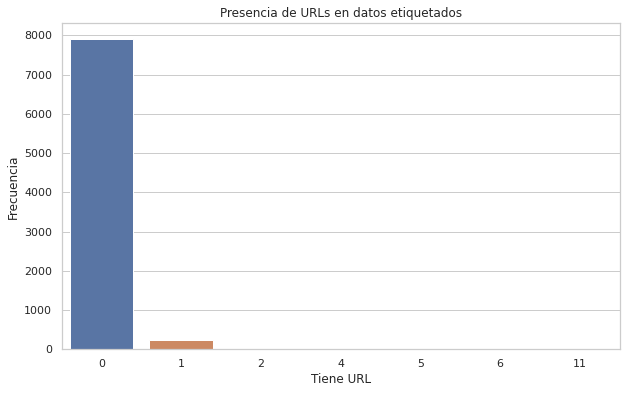

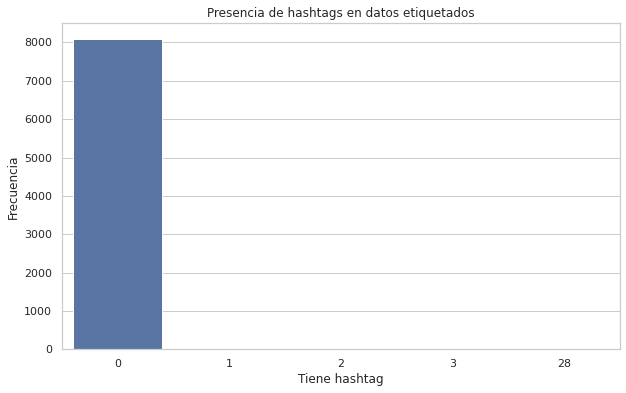

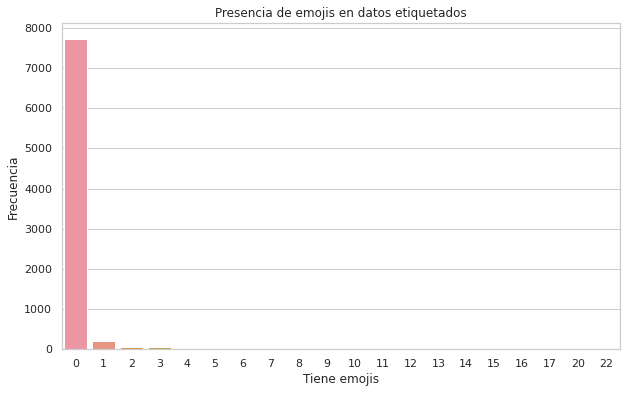

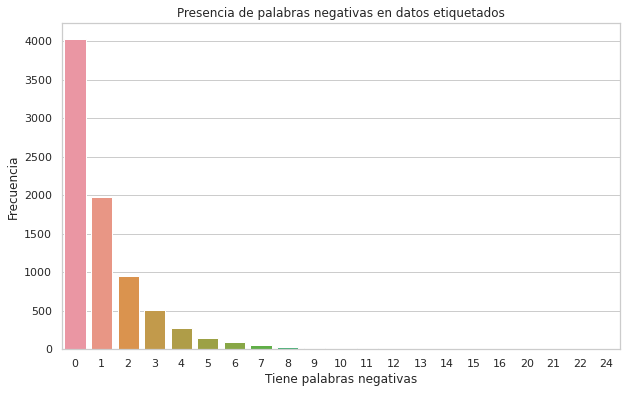

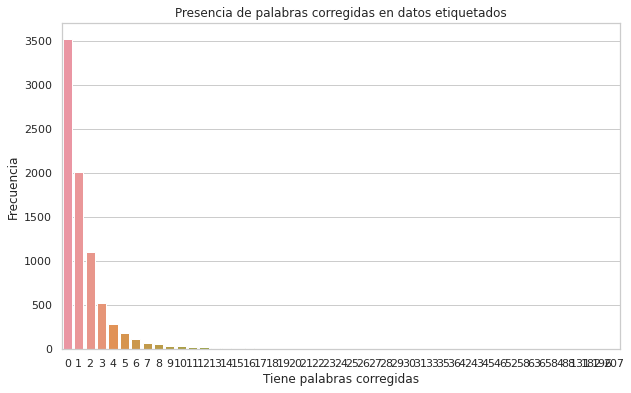

In [22]:
#train_data.to_csv("train_analysis.csv", index=False, header=True)
# Visualización de datos
sns.set(style="whitegrid")

# Gráfico de barras para verificar la presencia de URLs
plt.figure(figsize=(10, 6))
sns.countplot(x='url', data=train_data)
plt.title('Presencia de URLs en datos etiquetados')
plt.xlabel('Tiene URL')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para verificar la presencia de hashtags
plt.figure(figsize=(10, 6))
sns.countplot(x='hashtag', data=train_data)
plt.title('Presencia de hashtags en datos etiquetados')
plt.xlabel('Tiene hashtag')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para verificar la presencia de emojis
plt.figure(figsize=(10, 6))
sns.countplot(x='emojis', data=train_data)
plt.title('Presencia de emojis en datos etiquetados')
plt.xlabel('Tiene emojis')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para verificar la presencia de insultos
plt.figure(figsize=(10, 6))
sns.countplot(x='negative_words', data=train_data)
plt.title('Presencia de palabras negativas en datos etiquetados')
plt.xlabel('Tiene palabras negativas')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para verificar la presencia de correciones
plt.figure(figsize=(10, 6))
sns.countplot(x='corrections', data=train_data)
plt.title('Presencia de palabras corregidas en datos etiquetados')
plt.xlabel('Tiene palabras corregidas')
plt.ylabel('Frecuencia')
plt.show()

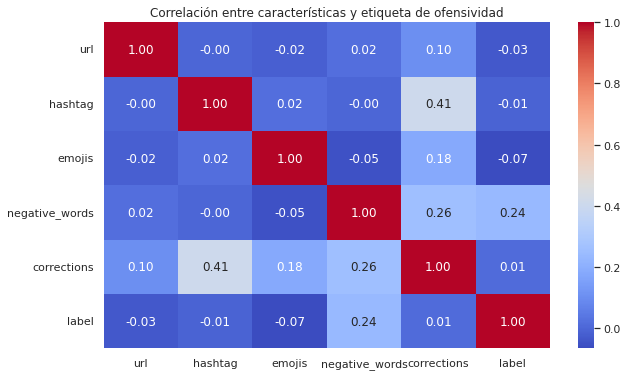

In [23]:
# Análisis de correlación entre características y etiqueta de ofensividad (si está presente)
if 'label' in train_data.columns:
    correlation_matrix = train_data[[ 'url', 'hashtag', 'emojis', 'negative_words','corrections', 'label']].corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlación entre características y etiqueta de ofensividad')
    plt.show()


In [38]:
'''
total_texts = len(test_data)
test_data['clean_text'] = ""
test_data['corrections'] = 0

for i, text in enumerate(test_data['text']):
    corrected_text, corrections_count = correct_spelling(text, i ,total_texts)
    test_data.at[i, 'clean_text'] = corrected_text
    test_data.at[i, 'corrections'] = corrections_count  

'''
test_data['url'] = test_data['text'].apply(extract_urls)
test_data['hashtag'] = test_data['text'].apply(extract_hashtags)
test_data['emojis'] = test_data['text'].apply(count_emojis)
test_data['negative_words'] = test_data['text'].apply(has_english_insult)
#test_data.to_csv("test_nolabel_analysis.csv", index=False, header=True)

test_data[:5]

,text,id,clean_text,corrections,url,hashtag,emojis,negative_words
0,Well media selected them exactly because they'...,ce40fcb3a33,medium select exactly stupid ignorant level sa...,0,0,0,0,6
1,We must stand together to return this mass of ...,02ca950343c,stand return mass people come need stand gover...,0,0,0,0,2
2,http://apologeticspress.org/APContent.aspx?cat...,a59e88b4f9c,http://apologeticspress.org/APContent.aspx?cat...,0,1,0,0,0
3,"The UK has universal healthcare you dickwad, t...",ad62d80af38,up universal healthcare dickhead medical cost ...,4,0,0,0,1
4,Is that comment good for clergyman Paul Kosyl?,a6b36372f05,comment good clergyman pal nosy,2,0,0,0,0


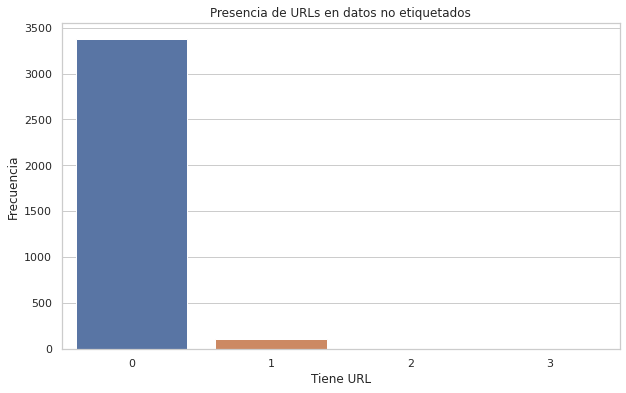

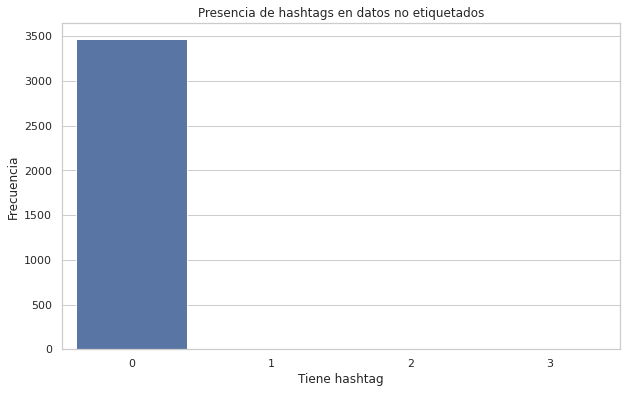

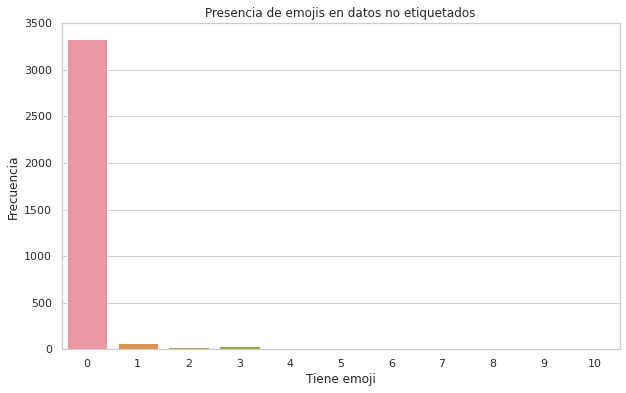

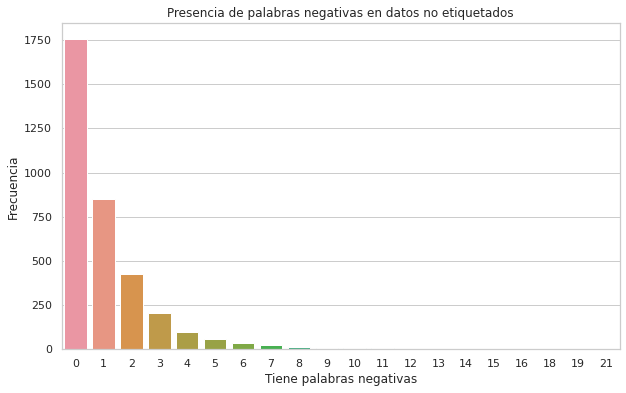

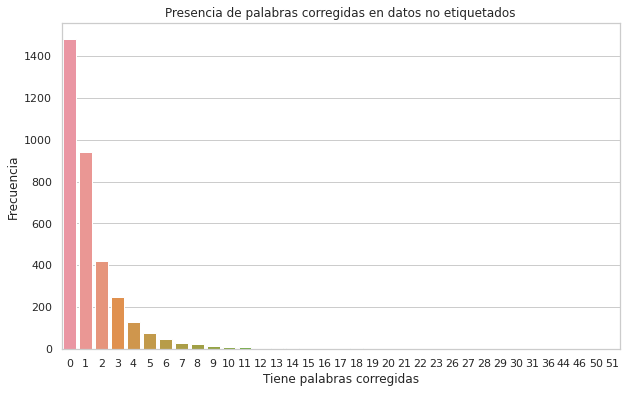

In [40]:
# Gráfico de barras para verificar la presencia de URLs
plt.figure(figsize=(10, 6))
sns.countplot(x='url', data=test_data)
plt.title('Presencia de URLs en datos no etiquetados')
plt.xlabel('Tiene URL')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para verificar la presencia de hashtags
plt.figure(figsize=(10, 6))
sns.countplot(x='hashtag', data=test_data)
plt.title('Presencia de hashtags en datos no etiquetados')
plt.xlabel('Tiene hashtag')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para verificar la presencia de emojis
plt.figure(figsize=(10, 6))
sns.countplot(x='emojis', data=test_data)
plt.title('Presencia de emojis en datos no etiquetados')
plt.xlabel('Tiene emoji')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para verificar la presencia de insultos
plt.figure(figsize=(10, 6))
sns.countplot(x='negative_words', data=test_data)
plt.title('Presencia de palabras negativas en datos no etiquetados')
plt.xlabel('Tiene palabras negativas')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para verificar la presencia de correciones
plt.figure(figsize=(10, 6))
sns.countplot(x='corrections', data=test_data)
plt.title('Presencia de palabras corregidas en datos no etiquetados')
plt.xlabel('Tiene palabras corregidas')
plt.ylabel('Frecuencia')
plt.show()